## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import sem
from sklearn import datasets
from scipy.stats import linregress
import numpy as np
import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id_and_timepoint = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dup_id_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. (Talked about this in study group)
all_for_dup_mouse = combined_df[combined_df["Mouse ID"] == "g989"]
all_for_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (drop by index)
dup_mouse_index = combined_df[combined_df["Mouse ID"] == "g989"].index
cleaned_df = combined_df.drop(dup_mouse_index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_regimen_df = cleaned_df.groupby(["Drug Regimen"])

mean_tvolume = grouped_regimen_df["Tumor Volume (mm3)"].mean()
median_tvolume = grouped_regimen_df["Tumor Volume (mm3)"].median()
var_tvolume = grouped_regimen_df["Tumor Volume (mm3)"].var()
std_tvolume = grouped_regimen_df["Tumor Volume (mm3)"].std()
sem_tvolume = grouped_regimen_df["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean": mean_tvolume, 
                         "Median": median_tvolume, 
                         "Variance": var_tvolume, 
                         "Std. Deviation": std_tvolume, 
                        "SEM": sem_tvolume})
stats_df

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = grouped_regimen_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

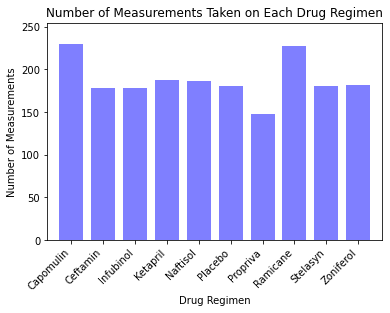

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_per_drug = grouped_regimen_df["Drug Regimen"].count()

pandas_bar_chart = measurements_per_drug
pandas_bar_chart.plot(kind="bar", color="blue", alpha=0.5, align="center", width=0.75)
plt.xticks(rotation=45, ha="right")
plt.xlim(-0.75, len(measurements_per_drug)-0.25)
plt.ylim(0, max(measurements_per_drug)+25)
plt.title("Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

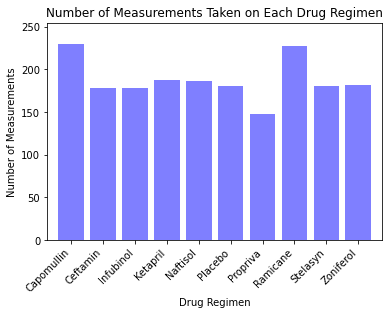

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis_bar = ["Capomullin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis_bar = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
plt.bar(x_axis_bar, y_axis_bar, color="blue", alpha=0.5, align="center")
py_tick_locations_bar = [value for value in x_axis_bar]
plt.xticks(py_tick_locations_bar, rotation=45, ha="right")
plt.xlim(-0.75, len(x_axis_bar)-0.25)
plt.ylim(0, max(y_axis_bar)+25)
plt.title("Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

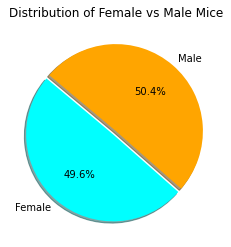

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = cleaned_df.groupby(["Sex"])
gender_count = grouped_gender["Mouse ID"].nunique()
colors = ["cyan", "orange"]
explode=[0.05, 0]

pandas_pie_chart = gender_count.plot(kind="pie", explode=explode, colors=colors, startangle=140, 
                                     autopct="%1.1f%%", title="Distribution of Female vs Male Mice", shadow=True)
pandas_pie_chart.set_ylabel("")
plt.show()

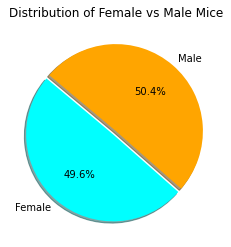

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_gender = cleaned_df.groupby(["Sex"])
gender_count = grouped_gender["Mouse ID"].nunique()

gender = ["Female", "Male"]
gender_totals = [123, 125]
colors = ["cyan", "orange"]
explode = [0.05, 0]

plt.pie(gender_totals, labels=gender, explode=explode, colors=colors, startangle=140, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse_df = cleaned_df.groupby(["Mouse ID"])
last_timepoint = grouped_mouse_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge_df = pd.merge(cleaned_df, last_timepoint, on="Mouse ID")
timepoint_merge_df

max_timepoint_for_tvol = timepoint_merge_df[timepoint_merge_df["Timepoint_x"] == timepoint_merge_df["Timepoint_y"]]
max_timepoint_for_tvol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
grouped_treatments = max_timepoint_for_tvol.groupby(["Drug Regimen"])

#Create empty list to fill with tumor vol data (for plotting)
capomulin_tvolume = max_timepoint_for_tvol.loc[(max_timepoint_for_tvol["Drug Regimen"] == "Capomulin"), 
                                                 ["Tumor Volume (mm3)"]]

ramicane_tvolume = max_timepoint_for_tvol.loc[(max_timepoint_for_tvol["Drug Regimen"] == "Ramicane"), 
                                              ["Tumor Volume (mm3)"]]

infubinol_tvolume = max_timepoint_for_tvol.loc[(max_timepoint_for_tvol["Drug Regimen"] == "Infubinol"), 
                                               ["Tumor Volume (mm3)"]]

ceftamin_tvolume = max_timepoint_for_tvol.loc[(max_timepoint_for_tvol["Drug Regimen"] == "Ceftamin"), 
                                              ["Tumor Volume (mm3)"]]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
cap_quartiles = capomulin_tvolume.quantile([.25, .5, .75])
cap_lowerq = np.percentile(cap_quartiles, 25)
cap_upperq = np.percentile(cap_quartiles, 75)
cap_iqr = cap_upperq - cap_lowerq

ram_quartiles = ramicane_tvolume.quantile([.25, .5, .75])
ram_lowerq = np.percentile(ram_quartiles, 25)
ram_upperq = np.percentile(ram_quartiles, 75)
ram_iqr = ram_upperq - ram_lowerq

infub_quartiles = infubinol_tvolume.quantile([.25, .5, .75])
infub_lowerq = np.percentile(infub_quartiles, 25)
infub_upperq = np.percentile(infub_quartiles, 75)
infub_iqr = infub_upperq - infub_lowerq

ceft_quartiles = ceftamin_tvolume.quantile([.25, .5, .75])
ceft_lowerq = np.percentile(ceft_quartiles, 25)
ceft_upperq = np.percentile(ceft_quartiles, 75)
ceft_iqr = ceft_upperq - ceft_lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes 
#(instructions unclear, does this mean rows which contain mice for each of the four specific treatments? 
#Or for all of the treatments?)

    
# add subset 
    
    
# Determine outliers using upper and lower bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"For Capomulin, values below {cap_lower_bound} and above {cap_upper_bound} could be outliers.")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"For Ramicane, values below {ram_lower_bound} and above {ram_upper_bound} could be outliers.")

infub_lower_bound = infub_lowerq - (1.5*infub_iqr)
infub_upper_bound = infub_upperq + (1.5*infub_iqr)
print(f"For Infubinol, values below {infub_lower_bound} and above {infub_upper_bound} could be outliers.")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"For Ceftamin, values below {ceft_lower_bound} and above {ceft_upper_bound} could be outliers.")

For Capomulin, values below 29.41486302499999 and above 44.97858994500001 could be outliers.
For Ramicane, values below 27.237158380000004 and above 45.43423182 could be outliers.
For Infubinol, values below 48.499042704999994 and above 71.453313025 could be outliers.
For Ceftamin, values below 42.603702549999994 and above 73.75920691 could be outliers.


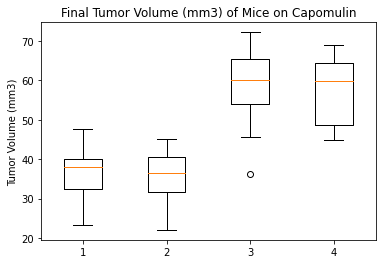

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Struggled with all sorts of errors on this one, so for the sake of time I just typed out new lists. 
# Obviously wouldn't want to do this in the real world in case I mistyped the data, so I will go back and learn this.
cap_list = [23.343598, 28.484033, 28.430964, 30.485985, 31.023923, 31.896238, 32.377357, 33.329098, 34.455298, 37.311846,
           36.041047, 37.074024, 38.846876, 38.939633, 38.982878, 38.753265, 38.125164, 39.952347, 40.658124, 40.159220,
           40.728578, 41.483008, 41.851521, 47.685963, 46.539206]
ram_list = [22.050126, 29.128472, 30.276232, 30.564625, 30.638696, 31.560470, 31.095335, 33.397653, 32.978522, 33.562402, 
           36.134852, 38.810366, 37.225650, 36.374510, 36.561652, 37.311236, 38.342008, 38.407618, 40.659006, 40.667713,
           45.220869, 43.047543, 43.419381, 43.166373, 44.183451]
infub_list = [67.973419, 65.525743, 57.031862, 66.083066, 72.226731, 36.321346, 60.969711, 62.435404, 60.918767, 67.289621,
             66.196912, 62.117279, 47.010364, 60.165180, 55.629428, 45.699331, 54.656549, 55.650681, 46.250112, 54.048608, 
             51.542431, 50.005138, 58.268442, 67.685569, 62.754451]
ceft_list = [62.999356, 45.000000, 56.057749, 55.742829, 48.722078, 47.784682, 61.849023, 68.923185, 67.748662, 57.918381, 
            46.784535, 59.851956, 64.299830, 59.741901, 61.433892, 64.192341, 45.000000, 52.925348, 45.000000, 67.527482,
            45.000000, 64.634949, 61.386660, 68.594745, 64.729837]

data = [cap_list, ram_list, infub_list, ceft_list]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume (mm3) of Mice on Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

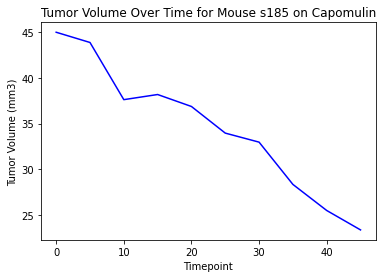

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Pull out the mice who took Capomulin to find a specific mouse ID
cap_treatments_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin"), 
                                                  ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Pull out the timepoint for that specific mouse to store as our x-axis
s185_timepoint = cap_treatments_df.loc[cap_treatments_df["Mouse ID"] == "s185", ["Timepoint"]]

#Pull out the tumor volumes for that specific mouse to store as our y-axis
s185_tvol = cap_treatments_df.loc[cap_treatments_df["Mouse ID"] == "s185", ["Tumor Volume (mm3)"]]

plt.plot(s185_timepoint, s185_tvol, color="blue")
plt.title("Tumor Volume Over Time for Mouse s185 on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

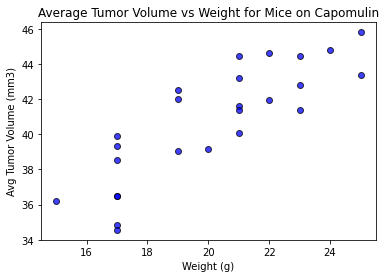

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_groupby = cleaned_df.groupby(["Mouse ID"])
mouse_weight = mouse_groupby["Weight (g)"].unique()
tvol_vs_mouse_weight = pd.DataFrame({"Drug Regimen": mouse_groupby["Drug Regimen"].unique(), 
                                      "Avg Tumor Volume (mm3)": mouse_groupby["Tumor Volume (mm3)"].mean(), 
                                     "Weight (g)": mouse_weight})

cap_weight = tvol_vs_mouse_weight.loc[tvol_vs_mouse_weight["Drug Regimen"] == "Capomulin",
                                       ["Weight (g)"]]

cap_tvol = tvol_vs_mouse_weight.loc[tvol_vs_mouse_weight["Drug Regimen"] == "Capomulin",
                                   ["Avg Tumor Volume (mm3)"]]

plt.scatter(cap_weight, cap_tvol, facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Average Tumor Volume vs Weight for Mice on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and the average tumor volume for the Capomulin regimen is 0.84
y = 0.95x + 21.55
The r-squared is: 0.7088567831695666


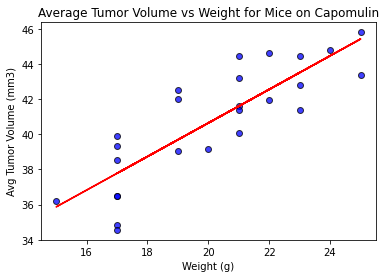

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Struggled to get linregress to work on already stored weight and volume variables, so for the sake of time I just created
# new ones. Obviously wouldn't want to do this in the real world in case I mistyped the data, so I will go back and learn this.
cap_weight_list = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
cap_tvol_list = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 
                 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 
                 41.384825, 41.352452, 36.182040, 38.506829]
# print(sts.linregress(cap_weight_list, cap_tvol_list))

correlation = sts.pearsonr(cap_weight_list, cap_tvol_list)
print(f"The correlation between weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

slope=0.9544396906021159
intercept=21.552160505085435
rvalue=0.8419363296411235
pvalue=1.3225733899751883e-07
stderr=0.12754359721776629
sts.linregress(cap_weight_list, cap_tvol_list)
regress_values = cap_weight * slope + intercept
line_eq = print(f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.plot(cap_weight_list, regress_values,"r-")
plt.scatter(cap_weight_list, cap_tvol_list, facecolors="blue", edgecolors="black", alpha=0.75)
plt.annotate(line_eq, (25, 50), fontsize=15, color = "red", ha="center")
plt.title("Average Tumor Volume vs Weight for Mice on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Observations and insights
1. Based on this data, there is a positive correlation between weight and average tumor volume. 
2. Also, we can see that Mouse s185's tumor did decrease over time while on Capomulin.
3. Finally, we can see Infubinol appears to be the only drug regimen with an outlier.